In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from data_analysis_blocked import *
from calculate_corrs import *
from spectrum_analysis import *

# Data Initialization

In [2]:
# Extent of the lattice
Nx = 8
Nt = 128
# Spacial volume of the lattice
Vx = Nx**3
# The parameters in the action
m_sq = -1050.
lmbd = 10000.0
alpha = 0.05

version = "3-1"

# The number of trajectories until thermalization
cutoff = 1000
# The size of the blocks needed to get uncorrelated block averages
block_size = 200

In [3]:
C = Correlators(Nx, Nt, m_sq, lmbd, alpha, version, 32, cutoff, block_size)

In [ ]:
C.save()

In [4]:
C.load("2023-10-11")

EOFError: Ran out of input

In [23]:
C.load_all_data()

Loading output_data/measurements_8x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-05-30_3-1.bin
Loading output_data/measurements_8x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-05-31_3-1.bin


In [24]:
Spec = Spectrum(Nt, block_size)

# $\langle \pi(p)\pi(p)\rangle$

In [25]:
Spec.corrs={}
Spec.energies={}

In [36]:
C.corrs.keys()

dict_keys(['sigma', 'psq', 'psqm', 'psq_I0', 'psq_I2', 'psqm_I0', 'psqm_I2'])

In [39]:
C.calc_pipi_corrs()
C.calc_ss_corrs()
C.calc_pipi_pipi_I0_corrs()
C.calc_pipi_pipi_I2_corrs()
C.calc_pipi_s_corrs()
C.calc_pipim_corrs()
C.calc_ssm_corrs()
C.calc_pipim_pipim_I0_corrs()
C.calc_pipim_pipim_I2_corrs()
C.calc_pipim_pipi_I0_corrs()
C.calc_pipim_pipi_I2_corrs()
C.calc_pipim_s_corrs()

4
5


In [28]:
Spec.add_corrs("pipi", np.real(C.corrs["pipi"])/np.real(C.corrs["pipi"])[:,0,None])
Spec.add_corrs("ss", np.real(C.corrs["ss"])/np.real(C.corrs["ss"])[:,0,None])
Spec.add_corrs("pipi_pipi_I0", np.real(C.corrs["pipi_pipi_I0"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None])
Spec.add_corrs("pipi_pipi_I2", np.real(C.corrs["pipi_pipi_I2"])/np.real(C.corrs["pipi_pipi_I2"])[:,0,None])
Spec.add_corrs("pipi_s", np.real(C.corrs["pipi_s"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)

#Spec.add_corrs("pipim0", np.real(C.corrs["pipim"][0])/np.real(C.corrs["pipim"])[0,:,0,None])
#Spec.add_corrs("ssm0", np.real(C.corrs["ssm"][0])/np.real(C.corrs["ssm"])[0,:,0,None])
#Spec.add_corrs("pipim_pipim0_I0", np.real(C.corrs["pipim_pipim_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None])
#Spec.add_corrs("pipim_pipim0_I2", np.real(C.corrs["pipim_pipim_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None])
#Spec.add_corrs("pipim_pipi0_I0", np.real(C.corrs["pipim_pipi_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5)
#Spec.add_corrs("pipim_pipi0_I2", np.real(C.corrs["pipim_pipi_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I2"])[:,0,None]**0.5)
#Spec.add_corrs("pipim_s0", np.real(C.corrs["pipim_s"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)

pipi energy is 0.42695187187486167/a +- 0.006044129385992621/a


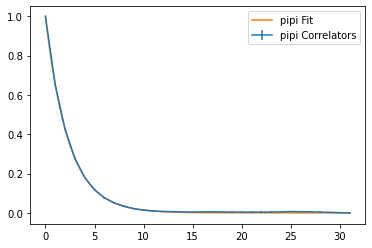

In [29]:
Spec.plot_fit("pipi")
plt.legend()

ss energy is 0.9344292154402944/a +- 0.0066327798864234625/a


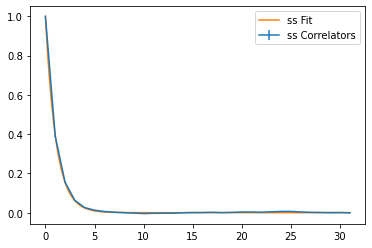

In [30]:
Spec.plot_fit("ss")
plt.legend()

pipi_pipi_I0 energy is 0.8646129976714484/a +- 0.0066975922814639845/a


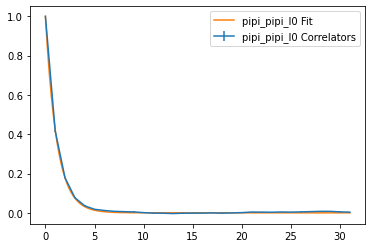

In [31]:
Spec.plot_fit("pipi_pipi_I0")
plt.legend()

pipi_pipi_I2 energy is 0.8838750709987208/a +- 0.008320759970021126/a


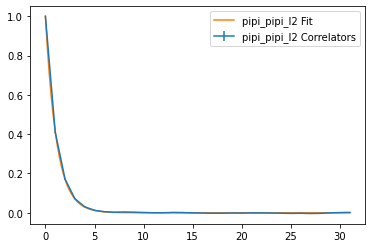

In [32]:
Spec.plot_fit("pipi_pipi_I2")
plt.legend()

pipi_s energy is 0.5130443284076244/a +- 0.013999296153837238/a


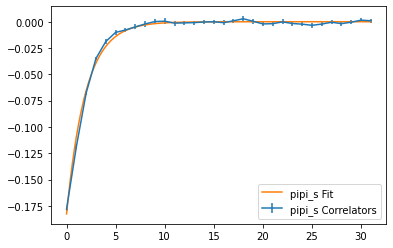

In [33]:
Spec.plot_fit("pipi_s")
plt.legend()

pipim0 energy is 0.4511444199745566/a +- 0.003533948327028708/a


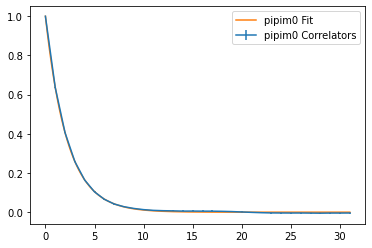

In [154]:
Spec.plot_fit("pipim0")
plt.legend()

ssm0 energy is 0.5741947084295171/a +- 0.0033456394589846355/a


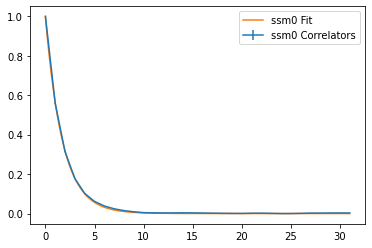

In [155]:
Spec.plot_fit("ssm0")
plt.legend()

pipim_pipim0 energy is 0.9290622369847984/a +- 0.006267201261862432/a


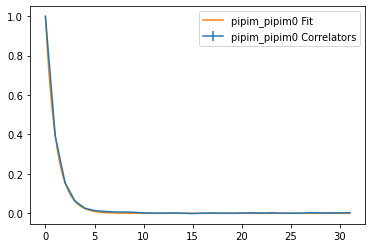

In [156]:
Spec.plot_fit("pipim_pipim0")
plt.legend()

pipim_pipi0 energy is 0.28031120996739783/a +- 0.1348770625470657/a


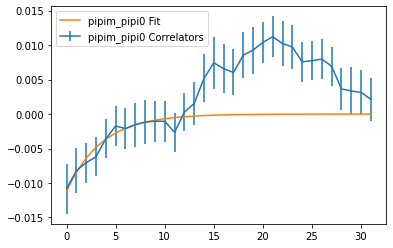

In [157]:
Spec.plot_fit("pipim_pipi0")
plt.legend()

pipim_s0 energy is 0.27450341297111386/a +- 0.06775281062051328/a


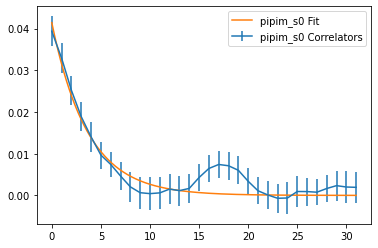

In [158]:
Spec.plot_fit("pipim_s0")
plt.legend()

In [159]:
Spec.use_matrix([["pipi_pipi",   "pipi_s",   "pipim_pipi0"],
                 ["pipi_s",      "ss",       "pipim_s0"],
                 ["pipim_pipi0", "pipim_s0", "pipim_pipim0"]])
#Spec.use_matrix([["pipi_pipi", "pipi_s"],
#                 ["pipi_s", "ss"]])

In [160]:
m1 = []
m1_err = []
m2 = []
m2_err = []
m3 = []
m3_err = []
for i in range(5):
    a = Spec.get_spectrum(i)
    m1.append(a[0][0])
    m1_err.append(a[1][0])
    m2.append(a[0][1])
    m2_err.append(a[1][1])
    m3.append(a[0][2])
    m3_err.append(a[1][2])

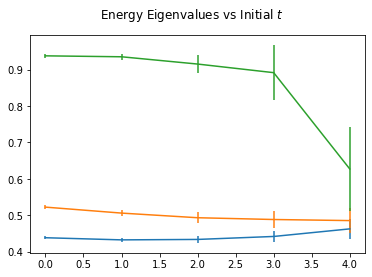

In [161]:
fig,ax = plt.subplots()

plt.errorbar(range(5), m1, yerr=m1_err)
plt.errorbar(range(5), m2, yerr=m2_err)
plt.errorbar(range(5), m3, yerr=m3_err)

fig.suptitle("Energy Eigenvalues vs Initial $t$")
fig.savefig("energies.png")

# Old Stuff

In [8]:
r=[]
E=[]
kinematic_ms = [[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [1,1,0,0],
                [1,0,1,0],
                [0,1,1,0],
                [1,1,1,0],
                [-1,1,1,0],
                [1,-1,1,0],
                [1,1,-1,0],
                [2,0,0,0],
                [0,2,0,0],
                [0,0,2,0],
                [3,0,0,0],
                [0,3,0,0],
                [0,0,3,0]]
for i in range(16):
    E.append(data.find_mass_from_fit(np.real(pim_corr_avgs[i]))[0])
    r.append((kinematic_ms[i][0]**2+kinematic_ms[i][1]**2+kinematic_ms[i][2]**2+kinematic_ms[i][3]**2)**0.5)
plt.plot(r,E)

NameError: name 'data' is not defined

# $\langle \sigma \pi(p)\pi(-p)\rangle$

<ErrorbarContainer object of 3 artists>

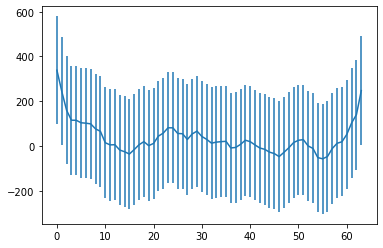

In [22]:
m=0
pipim_s_corr_avgs_bc, pipim_s_corr_errs = C.get_errors_from_blocks(C.corr_avgs["pipim_s"][m], C.corrs["pipim_s"][m])
plt.errorbar(range(len(pipim_s_corr_avgs_bc)), np.real(pipim_s_corr_avgs_bc), yerr=np.real(pipim_s_corr_errs))

<ErrorbarContainer object of 3 artists>

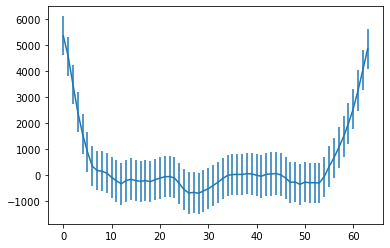

In [23]:
pipi_s_corr_avgs_bc, pipi_s_corr_errs = C.get_errors_from_blocks(C.corr_avgs["pipi_s"], C.corrs["pipi_s"])
plt.errorbar(range(len(pipi_s_corr_avgs_bc)), np.real(pipi_s_corr_avgs_bc), yerr=np.real(pipi_s_corr_errs))

<ErrorbarContainer object of 3 artists>

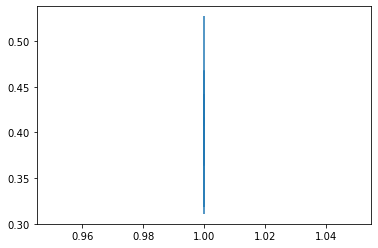

In [18]:
r=[]
E=[]
E_err=[]
kinematic_ms = [[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [1,1,0,0],
                [1,0,1,0],
                [0,1,1,0],
                [1,1,1,0],
                [-1,1,1,0],
                [1,-1,1,0],
                [1,1,-1,0],
                [2,0,0,0],
                [0,2,0,0],
                [0,0,2,0],
                [3,0,0,0],
                [0,3,0,0],
                [0,0,3,0]]
for i in range(3):
    data.calc_pipim_sigma_energy(i)
    E.append(data.pipim_sigma_E[i])
    E_err.append(data.pipim_sigma_E_err[i])
    r.append((kinematic_ms[i][0]**2+kinematic_ms[i][1]**2+kinematic_ms[i][2]**2+kinematic_ms[i][3]**2)**0.5)

plt.errorbar(r,E, yerr=E_err)

# $\langle \pi\pi(p)\pi\pi(p)\rangle$

<ErrorbarContainer object of 3 artists>

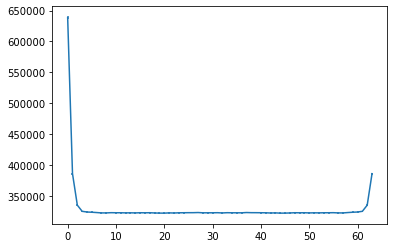

In [38]:
m=0
pipim_pipim_corr_avgs_bc, pipim_pipim_corr_errs = C.get_errors_from_blocks(C.corr_avgs["pipim_pipim"][m], C.corrs["pipim_pipim"][m])
plt.errorbar(range(len(pipim_pipim_corr_avgs_bc)), np.real(pipim_pipim_corr_avgs_bc), yerr=np.real(pipim_pipim_corr_errs))

In [37]:
C.calc_pipim_pipim_corrs()

In [40]:
C.vev["psqm"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<ErrorbarContainer object of 3 artists>

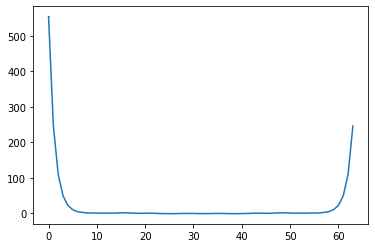

In [41]:
m=0
sm_corr_avgs_bc, sm_corr_errs = C.get_errors_from_blocks(C.corr_avgs["ssm"][m], C.corrs["ssm"][m])
plt.errorbar(range(len(sm_corr_avgs_bc)), np.real(sm_corr_avgs_bc), yerr=np.real(sm_corr_errs))

<ErrorbarContainer object of 3 artists>

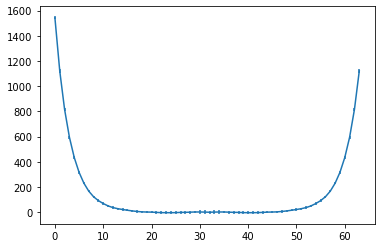

In [42]:
s_corr_avgs_bc, s_corr_errs = C.get_errors_from_blocks(C.corr_avgs["ss"], C.corrs["ss"])
plt.errorbar(range(len(s_corr_avgs_bc)), np.real(s_corr_avgs_bc), yerr=np.real(s_corr_errs))